In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [5]:
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset\other-American_B01362.csv
Dataset\other-Carmel_B00256.csv
Dataset\other-Dial7_B00887.csv
Dataset\other-Diplo_B01196.csv
Dataset\other-Federal_02216.csv
Dataset\other-FHV-services_jan-aug-2015.csv
Dataset\other-Firstclass_B01536.csv
Dataset\other-Highclass_B01717.csv
Dataset\other-Lyft_B02510.csv
Dataset\other-Prestige_B01338.csv
Dataset\other-Skyline_B00111.csv
Dataset\Uber-Jan-Feb-FOIL.csv
Dataset\uber-raw-data-apr14.csv
Dataset\uber-raw-data-aug14.csv
Dataset\uber-raw-data-janjune-15.csv
Dataset\uber-raw-data-jul14.csv
Dataset\uber-raw-data-jun14.csv
Dataset\uber-raw-data-may14.csv
Dataset\uber-raw-data-sep14.csv


In [6]:
files=os.listdir(r"Dataset")[-7:]
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [7]:
path=r"Dataset"

df=pd.DataFrame()
for file in files:

    f=pd.read_csv(path+"/"+file,encoding="utf-8")
    df=pd.concat([df,f])

In [8]:
df.shape

(4534327, 4)

In [9]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [10]:
df.rename(columns={'Date/Time':'Date_Time'},inplace=True)
df["Date_Time"]=pd.to_datetime(df["Date_Time"],format = "%m/%d/%Y %H:%M:%S")
df["weekday"]=df.Date_Time.dt.day_name()
df["month"]=df.Date_Time.dt.month
df["month_name"]=df.Date_Time.dt.month_name()
df["year"]=df.Date_Time.dt.year
df["minute"]=df.Date_Time.dt.minute
df['hour']=df.Date_Time.dt.hour
df["day"]=df.Date_Time.dt.day

In [11]:
df.head(5)

,Date_Time,Lat,Lon,Base,weekday,month,month_name,year,minute,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,April,2014,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,April,2014,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,April,2014,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,April,2014,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,April,2014,33,0,1


In [39]:
def color_list_func(n):
    from colormap import rgb2hex
    import random
    cl=[]
    for i in range(n):
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        cl.append(rgb2hex(r,g,b))
    return cl

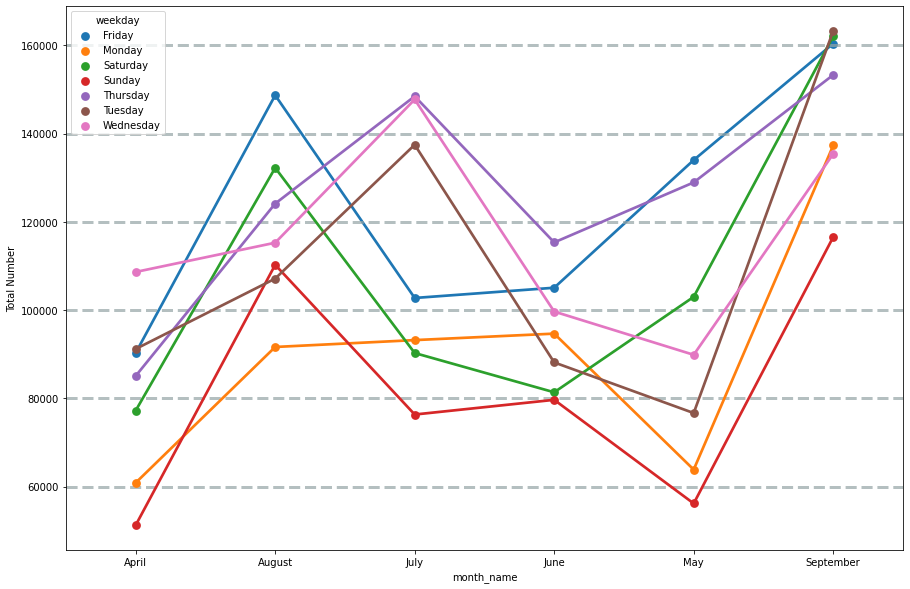

In [14]:

month1=df.groupby(["month_name","weekday"])["Date_Time"].count().reset_index()
month1.rename({"Date_Time":"count"},inplace=True)

plt.figure(figsize=(15,10))
sns.pointplot(x="month_name",y="Date_Time",data=month1,hue="weekday",sort=False)
plt.ylabel("Total Number")
plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y',alpha=0.7)
plt.savefig('month_name_weekday.png')

In [24]:
plt.figure(figsize=(20,15))
fig1=px.bar(df,
    x=df.weekday.value_counts().index,
    y=df.weekday.value_counts(),
    title="Journey by Weekdays",
    color=df.weekday.unique()
    # color=color_list_func(7)
)
fig1.update_layout(xaxis_title="Weekday",yaxis_title="Number of journey")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'color=Tuesday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Tuesday',
              'marker': {'color': '#636efa'},
              'name': 'Tuesday',
              'offsetgroup': 'Tuesday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Thursday'], dtype=object),
              'xaxis': 'x',
              'y': array([755145], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Wednesday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Wednesday',
              'marker': {'color': '#EF553B'},
              'name': 'Wednesday',
              'offsetgroup': 'Wednesday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Friday'], dtype=object),
              'xaxis': 'x',
              'y': array([741139], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Thursday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Thursday',
              'marker': {'color': '#00cc96'},
              'name': 'Thursday',
              'offsetgroup': 'Thursday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Wednesday'], dtype=object),
              'xaxis': 'x',
              'y': array([696488], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Friday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Friday',
              'marker': {'color': '#ab63fa'},
              'name': 'Friday',
              'offsetgroup': 'Friday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Tuesday'], dtype=object),
              'xaxis': 'x',
              'y': array([663789], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Saturday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Saturday',
              'marker': {'color': '#FFA15A'},
              'name': 'Saturday',
              'offsetgroup': 'Saturday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Saturday'], dtype=object),
              'xaxis': 'x',
              'y': array([646114], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Sunday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Sunday',
              'marker': {'color': '#19d3f3'},
              'name': 'Sunday',
              'offsetgroup': 'Sunday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Monday'], dtype=object),
              'xaxis': 'x',
              'y': array([541472], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'color=Monday<br>x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': 'Monday',
              'marker': {'color': '#FF6692'},
              'name': 'Monday',
              'offsetgroup': 'Monday',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Sunday'], dtype=object),
              'xaxis': 'x',
              'y': array([490180

<Figure size 1440x1080 with 0 Axes>

In [25]:
plt.figure(figsize=(20,15))
fig2=px.bar(
    x=df.hour.value_counts().index,
    y=df.hour.value_counts(),
    title="Journey by Hour",
    color=df.hour.unique()
)
fig2.update_layout(xaxis_title="Hour",yaxis_title="Number of journey")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<br>color=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                                         18, 19, 20, 21, 22, 23], dtype=int64),
                         'coloraxis': 'coloraxis'},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([17, 18, 16, 19, 20, 21, 15, 22, 14, 13,  7,  8, 12, 23, 11,  9, 10,  6,
                           0,  5,  1,  4,  3,  2], dtype=int64),
              'xaxis': 'x',
              'y': array([336190, 324679, 313400, 294513, 284604, 281460, 275466, 241858, 230625,
                          195877, 193094, 190504, 170452, 169190, 165703, 159967, 159148, 143213,
                          103836,  83939,  67227,  55230,  48287,  45865], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'coloraxis': {'colorbar': {'title': {'text': 'color'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Journey by Hour'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Hour'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Number of journey'}}}
})

<Figure size 1440x1080 with 0 Axes>

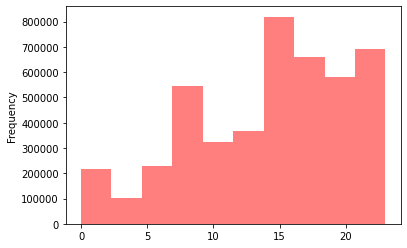

In [21]:
df.hour.plot(kind='hist',color="red",alpha=0.5)
plt.savefig('hour_hist.png')

In [26]:
plt.figure(figsize=(20,15))
fig3=px.pie(data_frame=df,
        values=df.groupby("month_name")["hour"].count(),
        hover_name=df.groupby("month_name")["hour"].count().index,
         color_discrete_sequence=px.colors.sequential.Rainbow_r,
        names=df.month_name.unique(),
        title="Month vise hourly journey",
        #labels={"value":"Hour"}
        
    
)
fig3.update_traces( 
                  marker=dict( line=dict(color='#000000', width=2)))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': '<b>%{hovertext}</b><br><br>label=%{label}<br>value=%{value}<extra></extra>',
              'hovertext': array(['April', 'August', 'July', 'June', 'May', 'September'], dtype=object),
              'labels': array(['April', 'August', 'July', 'June', 'May', 'September'], dtype=object),
              'legendgroup': '',
              'marker': {'line': {'color': '#000000', 'width': 2}},
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([ 564516,  829275,  796121,  663844,  652435, 1028136], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'piecolorway': [rgb(255,0,0), rgb(255,111,0), rgb(255,234,0),
                               rgb(151,255,0), rgb(44,255,150), rgb(0,152,255),
                               rgb(0,25,255), rgb(0,0,200), rgb(150,0,90)],
               'template': '...',
               'title': {'text': 'Month vise hourly journey'}}
})

<Figure size 1440x1080 with 0 Axes>

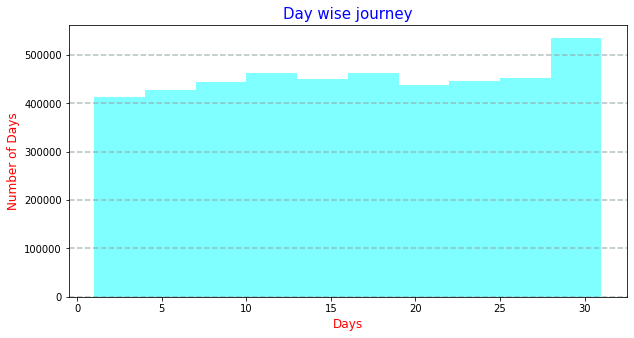

<Figure size 432x288 with 0 Axes>

In [29]:

plt.figure(figsize=(10,5))
df.day.plot(kind="hist",
color="cyan",
alpha=0.5
                                        )
plt.title("Day wise journey",fontsize="15",color="Blue")
plt.xlabel("Days",fontsize="12",color="red")
plt.ylabel("Number of Days",fontsize="12",color="red")
# df.day.value_counts(sort=False).plot(kind="line",color="red")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y',alpha=0.7)
plt.show()
plt.savefig('day_wise_journey.png')

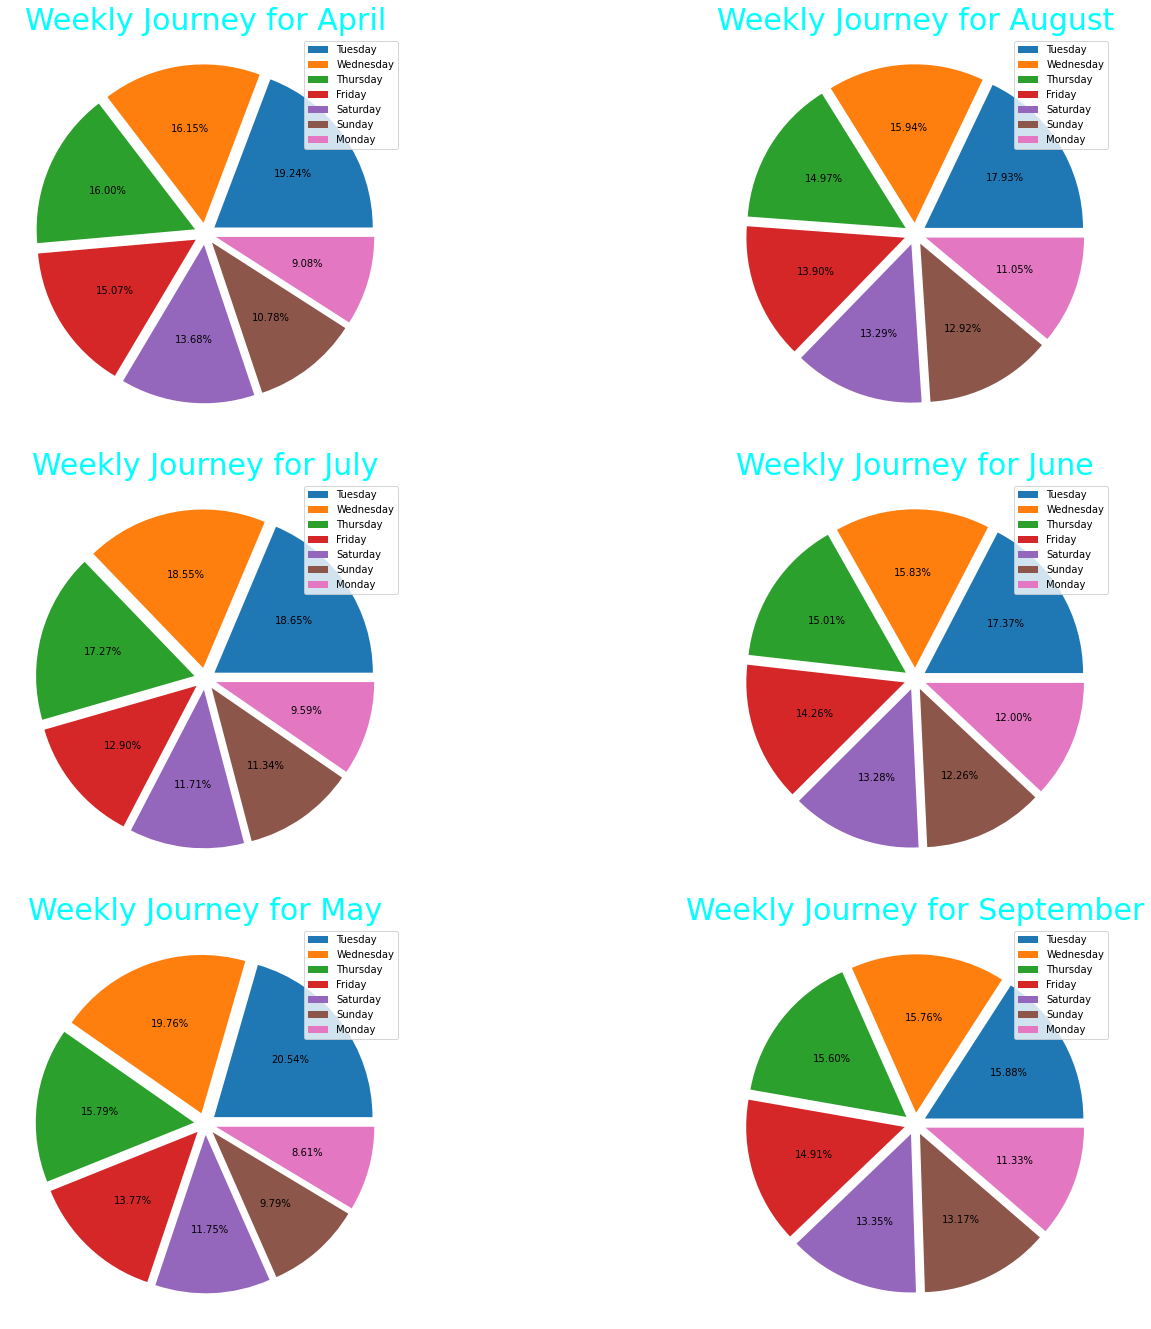

<Figure size 432x288 with 0 Axes>

In [35]:
explode_list=[0.07,0.07,0.07,0.07,0.07,0.07,0.07]
plt.figure(figsize=(20,25))
plt.legend(labels=df.weekday.unique(),loc="upper right")
for i,month in enumerate(df.month_name.unique(),1):
    
    plt.subplot(4,2,i)
    
    d=df[df.month_name==month]
    
    d["weekday"].value_counts().plot(kind="pie",
   
                                        autopct="%0.2f%%",
                                        labels=None,
                                        #pctdistance=1.1
                                        explode=explode_list

                                        )
    plt.tight_layout(pad=2)
    plt.title("Weekly Journey for "+ month,fontsize=30,color="cyan")
    plt.ylabel(None)
    plt.xticks(rotation=90)
    plt.legend(labels=df.weekday.unique(),loc="upper right",fontsize=10)
plt.show()
plt.savefig('weekly journey per month.png')

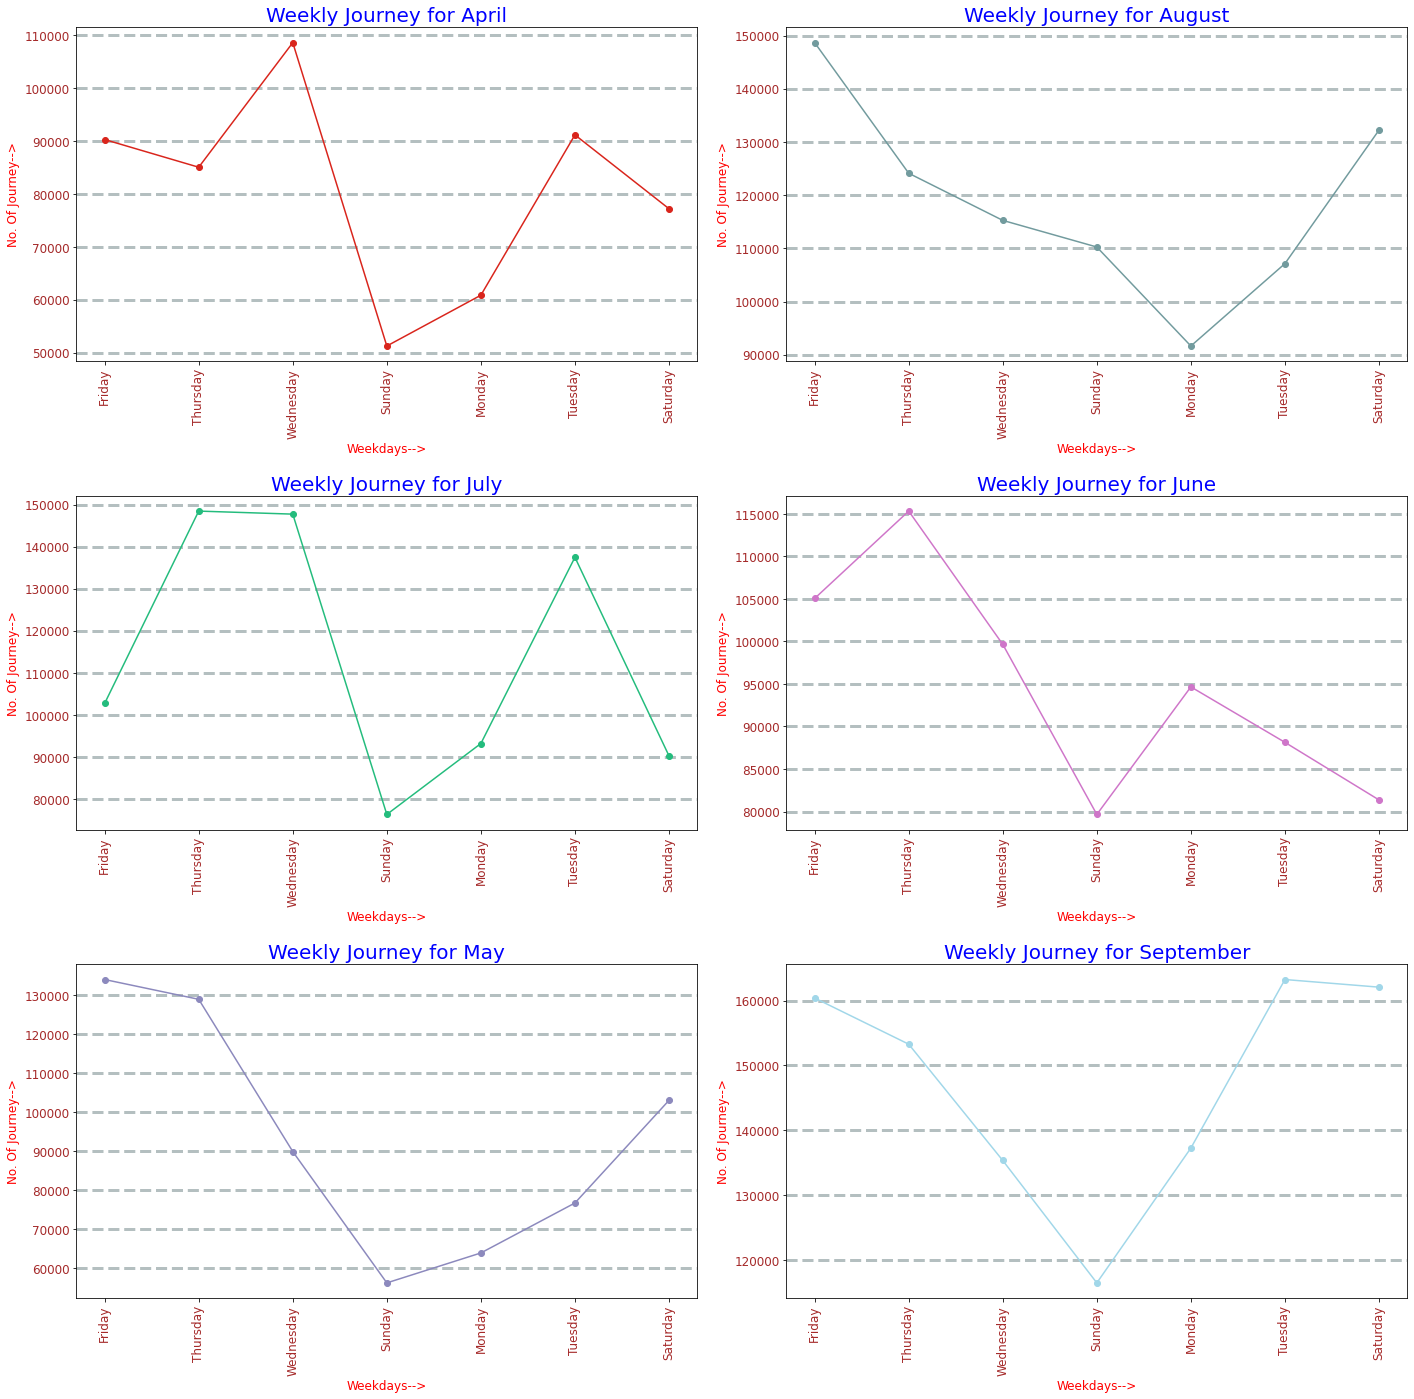

In [45]:
plt.figure(figsize=(20,25))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9"]
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(4,2,i)
    d=df[df.month_name==month]
    plt.plot(d.weekday.value_counts(sort=False),
                                "o-",
                                color=color_list[i]
                        )
    plt.xticks(rotation=90)
    plt.title("Weekly Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Weekdays-->",fontsize="12",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="12",color="red")
    plt.xticks(fontsize="12",color="brown")
    plt.yticks(fontsize="12",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y',alpha=0.7)

    plt.tight_layout(pad=2)
    plt.savefig('weekly journey for month line.png')

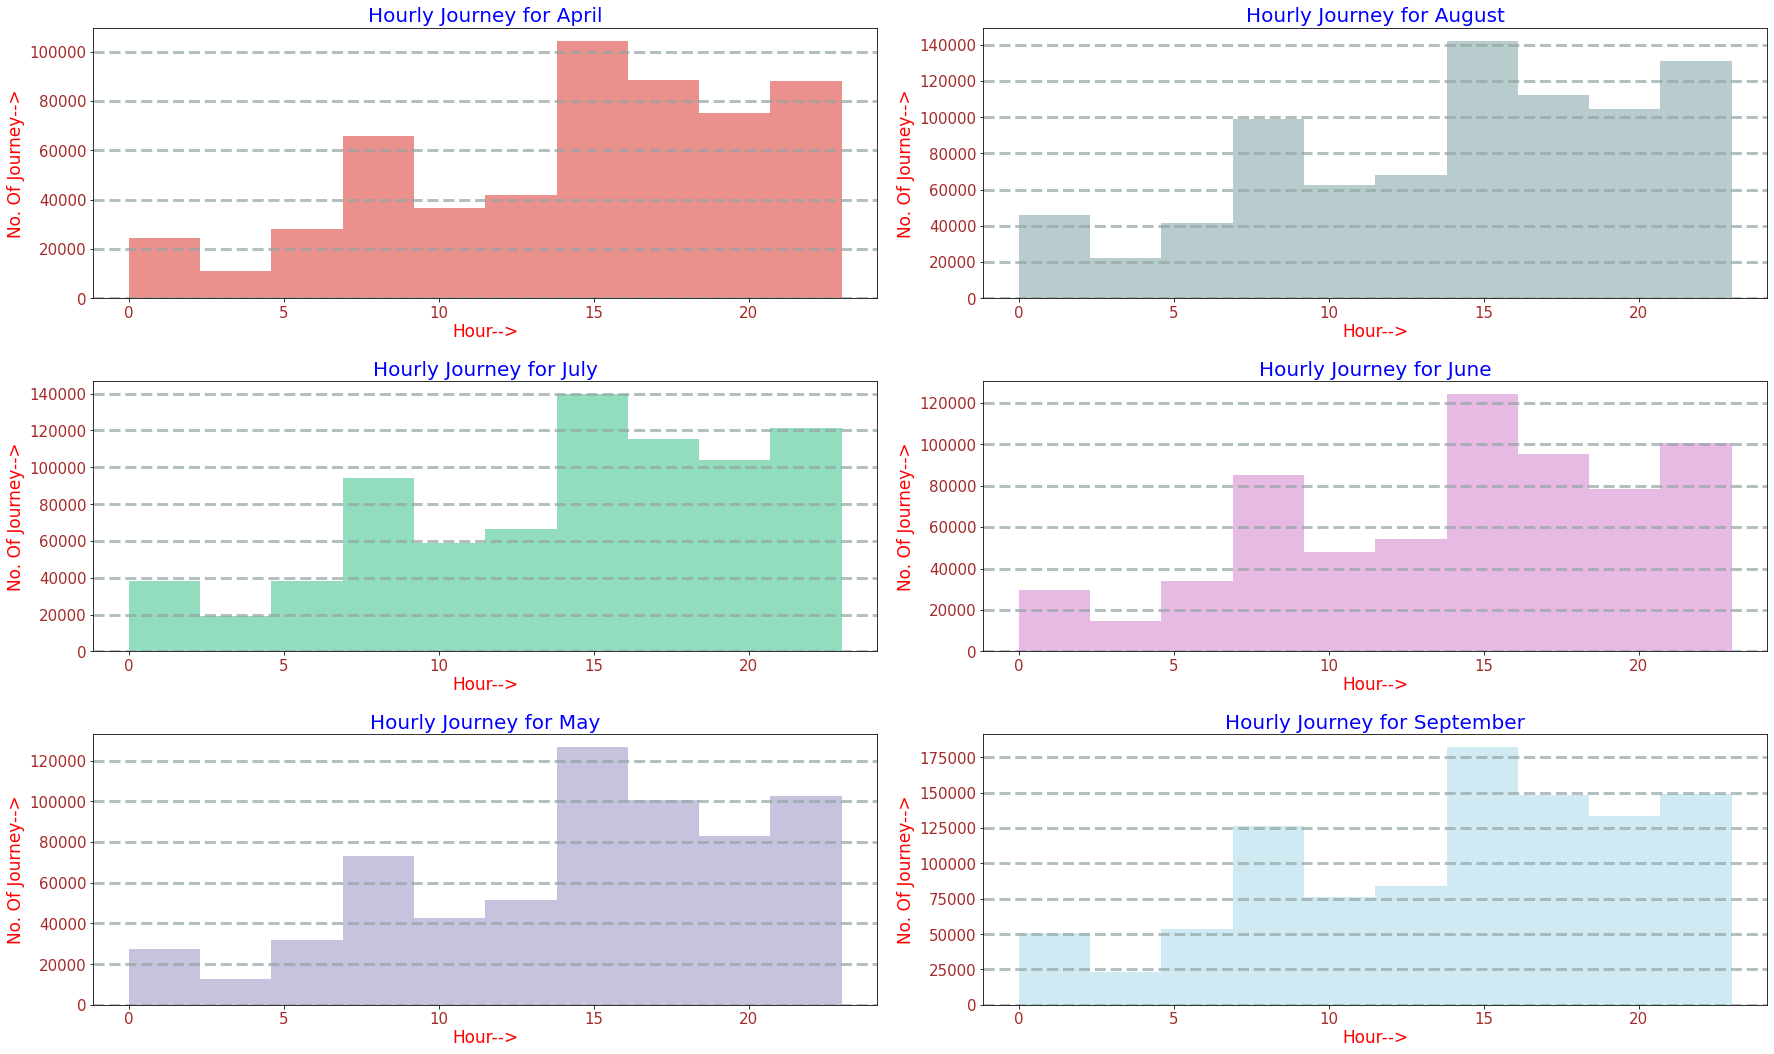

In [47]:
plt.figure(figsize=(25,15))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9"]
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.month_name==month]
    d.hour.plot(kind="hist",
            color=color_list[i],
            alpha=0.5
    )
    plt.xticks(rotation=0)
    plt.title("Hourly Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig('hourly journey per month.png')

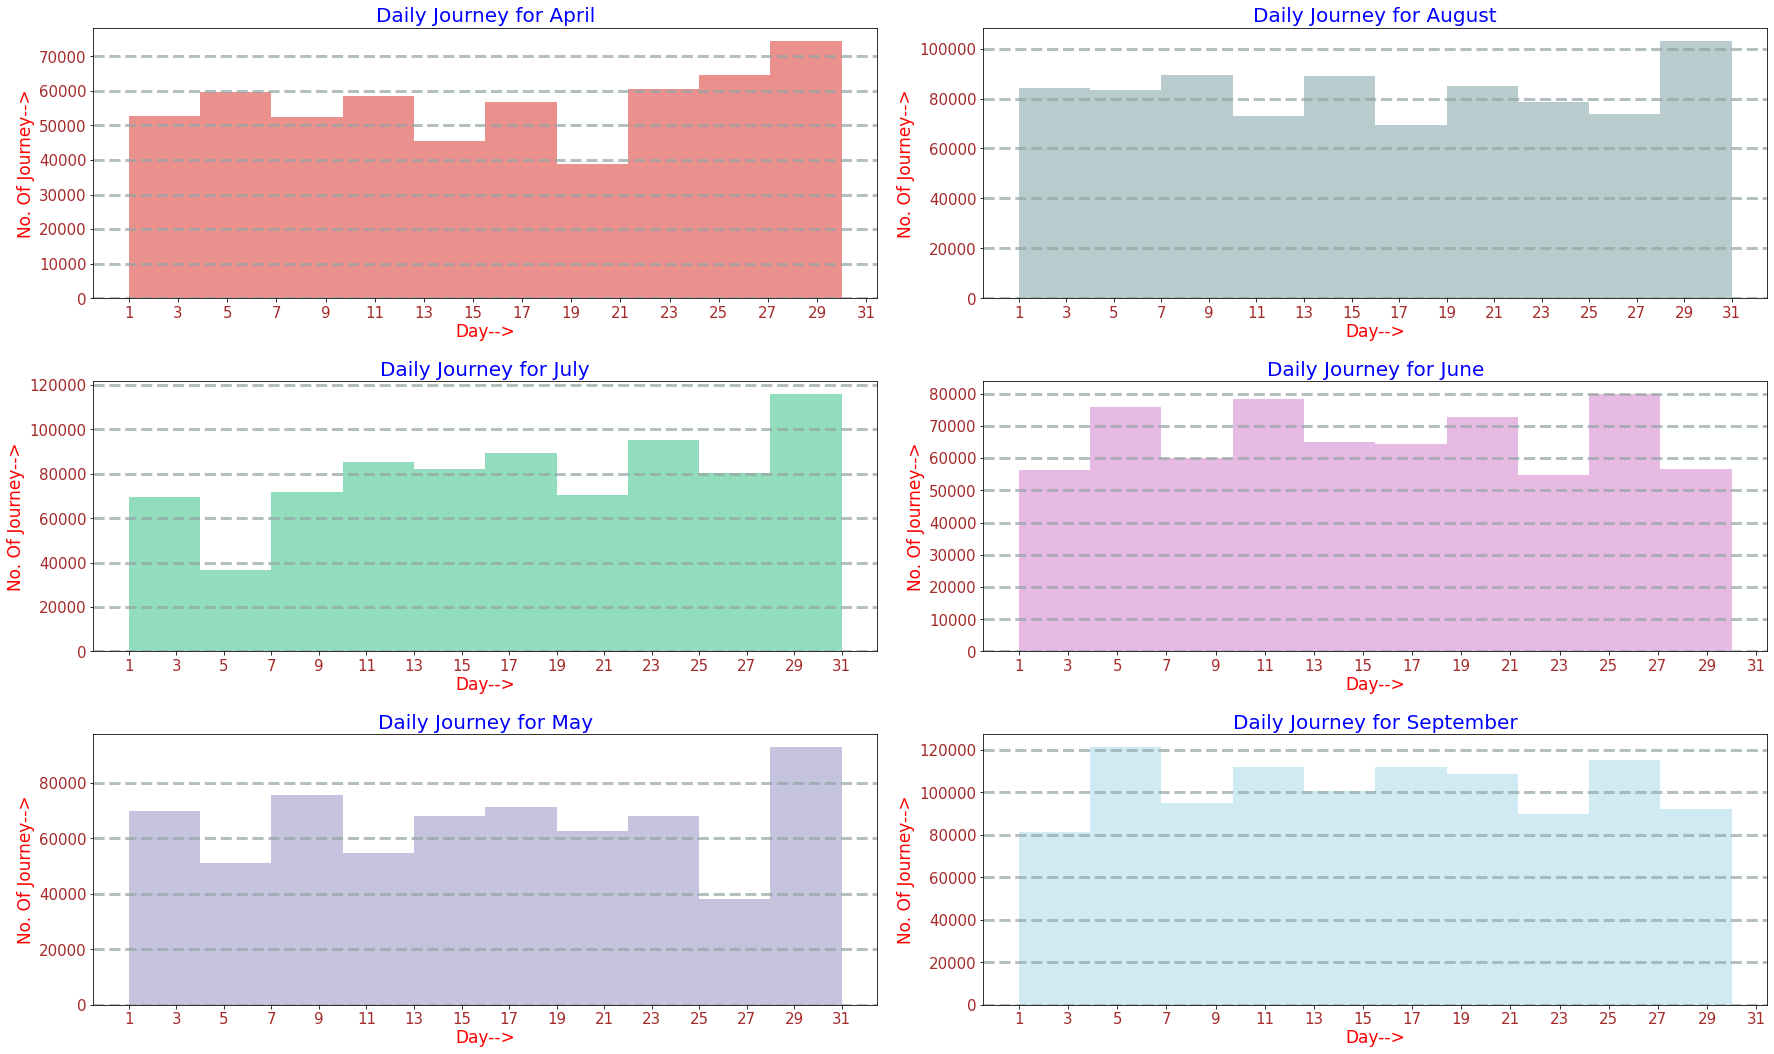

In [49]:
plt.figure(figsize=(25,15))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9"]
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.month_name==month]
    d.day.plot(kind="hist",
            color=color_list[i],
            alpha=0.5
    )
    plt.xticks(rotation=0)
    plt.title("Daily Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Day-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)

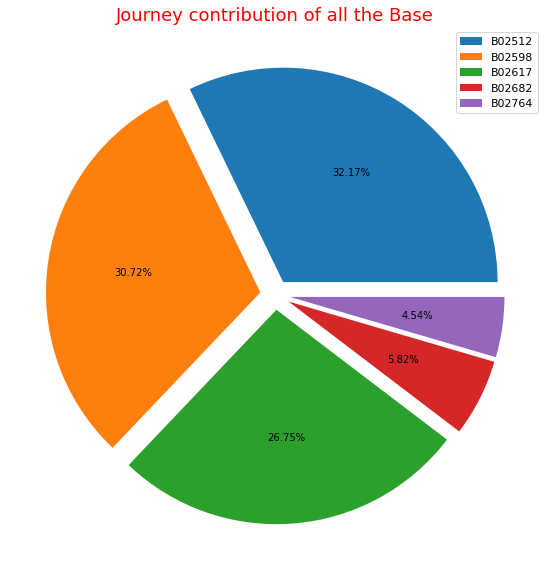

<Figure size 432x288 with 0 Axes>

In [51]:

explode_list=[0.07,0.07,0.07,0.07,0.07]
plt.figure(figsize=(15,8))
df.Base.value_counts().plot(kind="pie",
                                
                                autopct="%0.2f%%",
                                        labels=None,
                                        #pctdistance=1.1
                                        explode=explode_list

                                        )
plt.tight_layout(pad=2)
plt.title("Journey contribution of all the Base",fontsize=18,color="red")
plt.ylabel(None)
plt.legend(labels=df.Base.unique(),loc="upper right",fontsize=11)
plt.show()
plt.savefig('Journey contribution of all the Base.png')

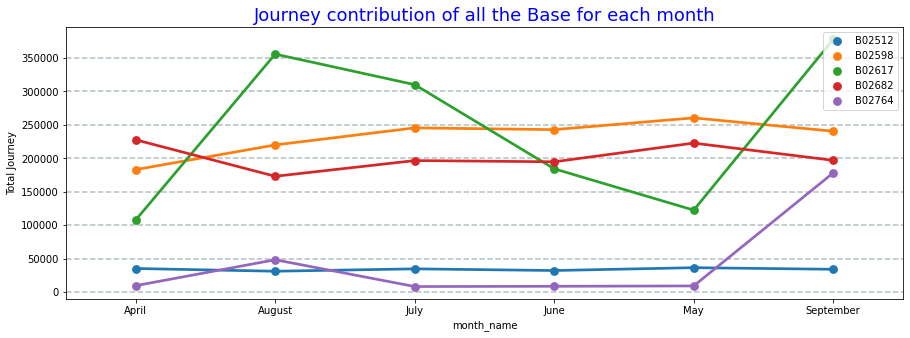

In [53]:
plt.figure(figsize=(15,5))
b=df.groupby(["Base","month_name"])["Date_Time"].count().reset_index()
sns.pointplot(x="month_name",y="Date_Time",hue="Base",data=b,err_style="bars",
ci=68)
plt.ylabel("Total Journey")
plt.title("Journey contribution of all the Base for each month",fontsize=18,color="blue")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y',alpha=0.7)
plt.legend(loc='upper right')
plt.savefig("Journey contribution of all the Base for each month line.png")

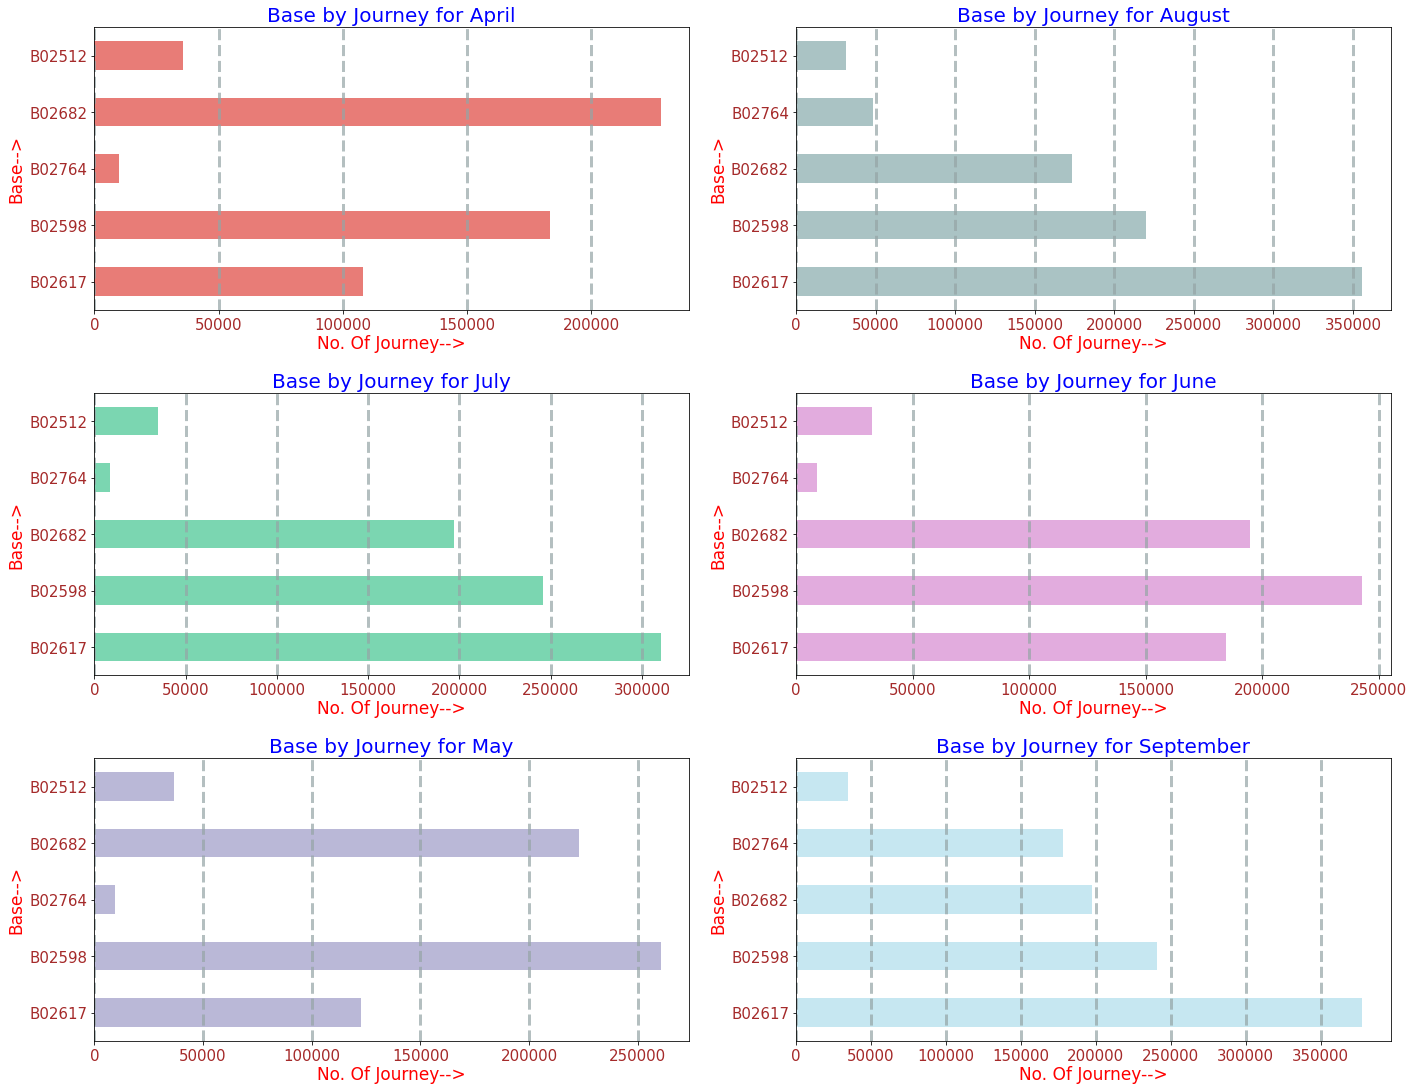

In [54]:

plt.figure(figsize=(20,20))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9"]
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(4,2,i)
    d=df[df.month_name==month]
    d.Base.value_counts(sort=False).plot(kind="barh",
            color=color_list[i],
            alpha=0.6
    )
    plt.xticks(rotation=0)
    plt.title("Base by Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("No. Of Journey-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("Base-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='x', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base for each month bar.png")

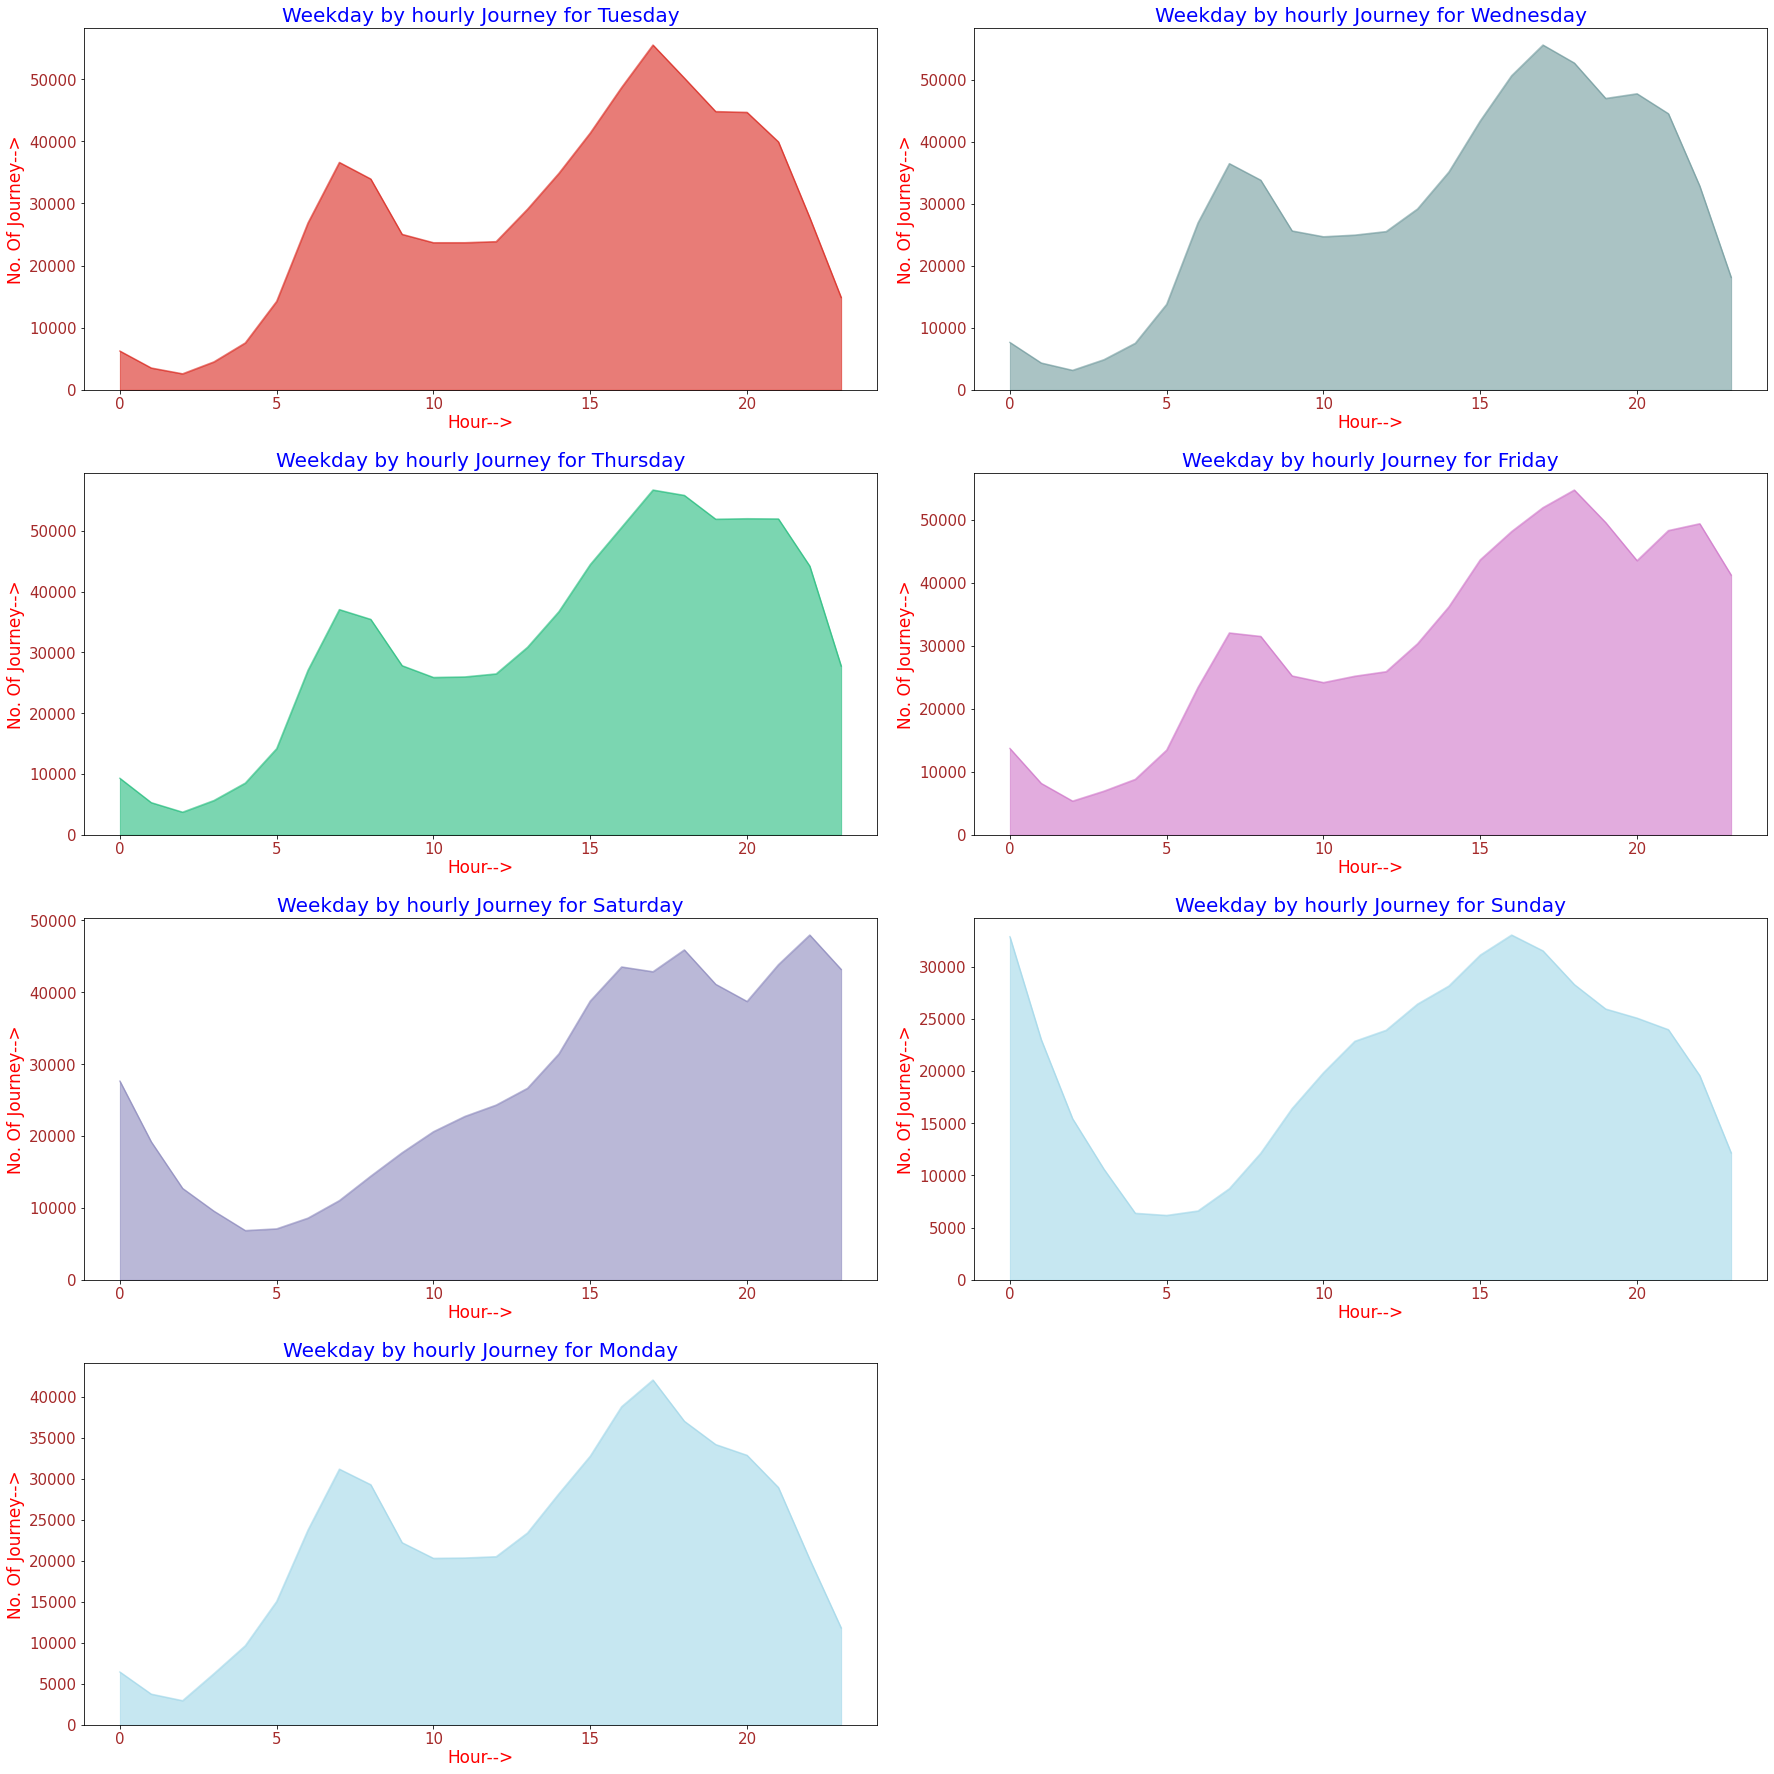

In [57]:
plt.figure(figsize=(25,25))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9","#a1d7e9"]
for i,weekday1 in enumerate(df.weekday.unique(),1):
    plt.subplot(4,2,i)
    d=df[df.weekday==weekday1]
    d.hour.value_counts(sort=False).plot(kind="area",
            color=color_list[i],
            alpha=0.6
    )
    plt.xticks(rotation=0)
    plt.title("Weekday by hourly Journey for "+ weekday1,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")    
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of weekday for each hour.png")

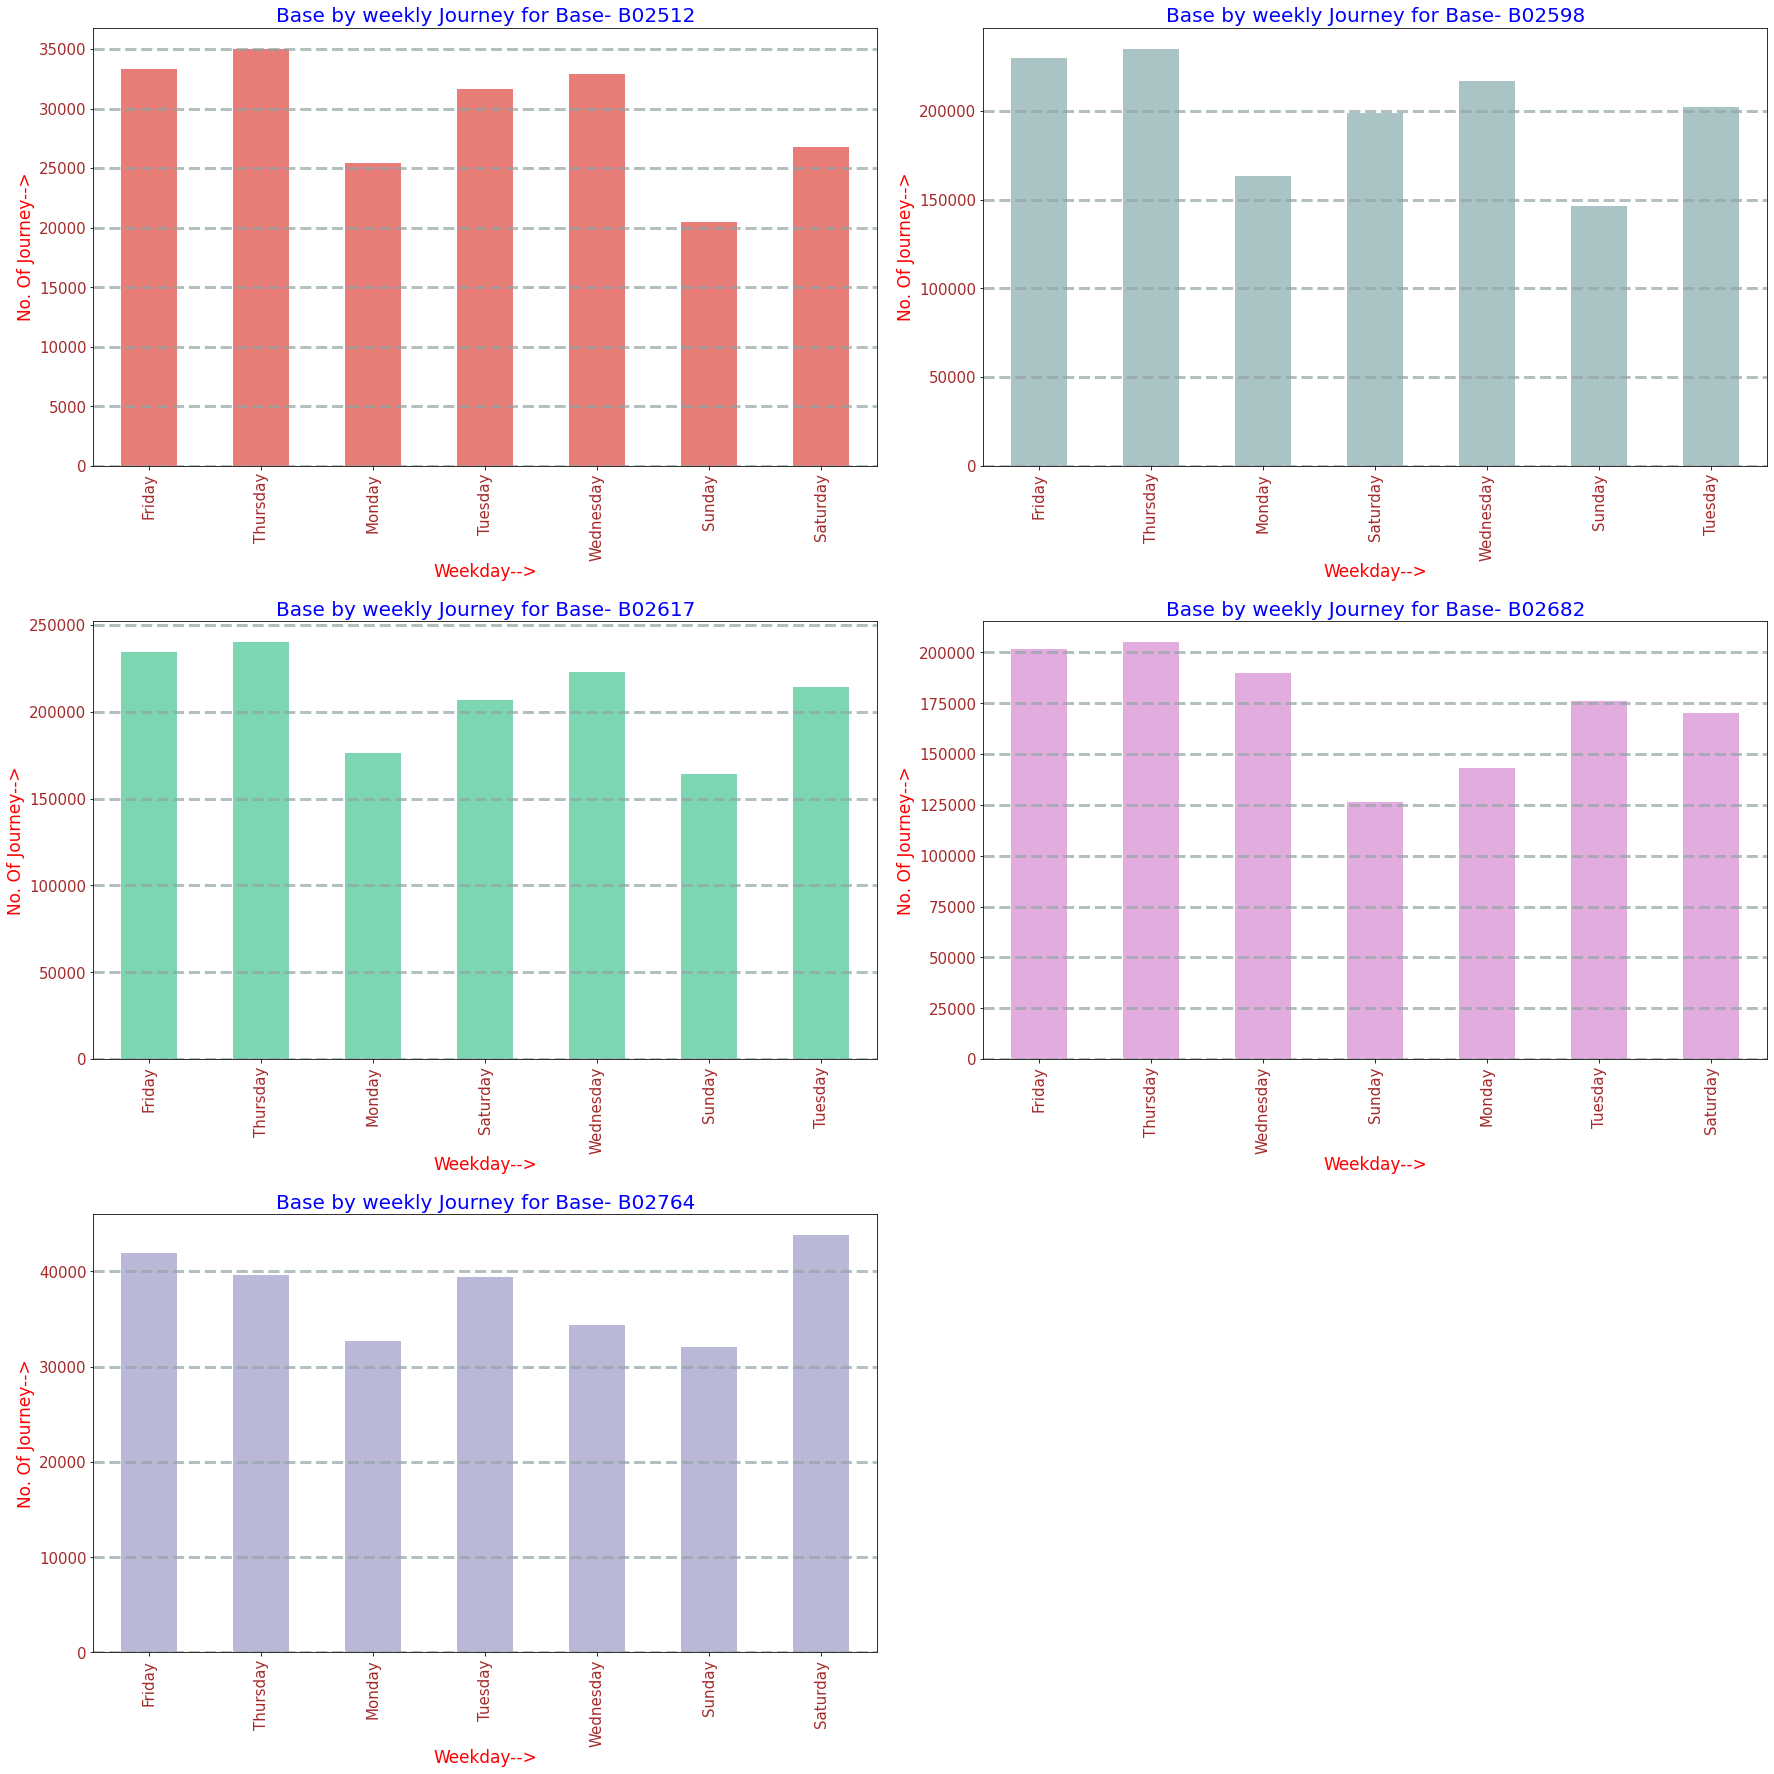

In [58]:
plt.figure(figsize=(25,25))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9","#a1d7e9"]
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.weekday.value_counts(sort=False).plot(kind="bar",
            color=color_list[i],
            alpha=0.6
    )

    plt.title("Base by weekly Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Weekday-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of base by weekday.png")

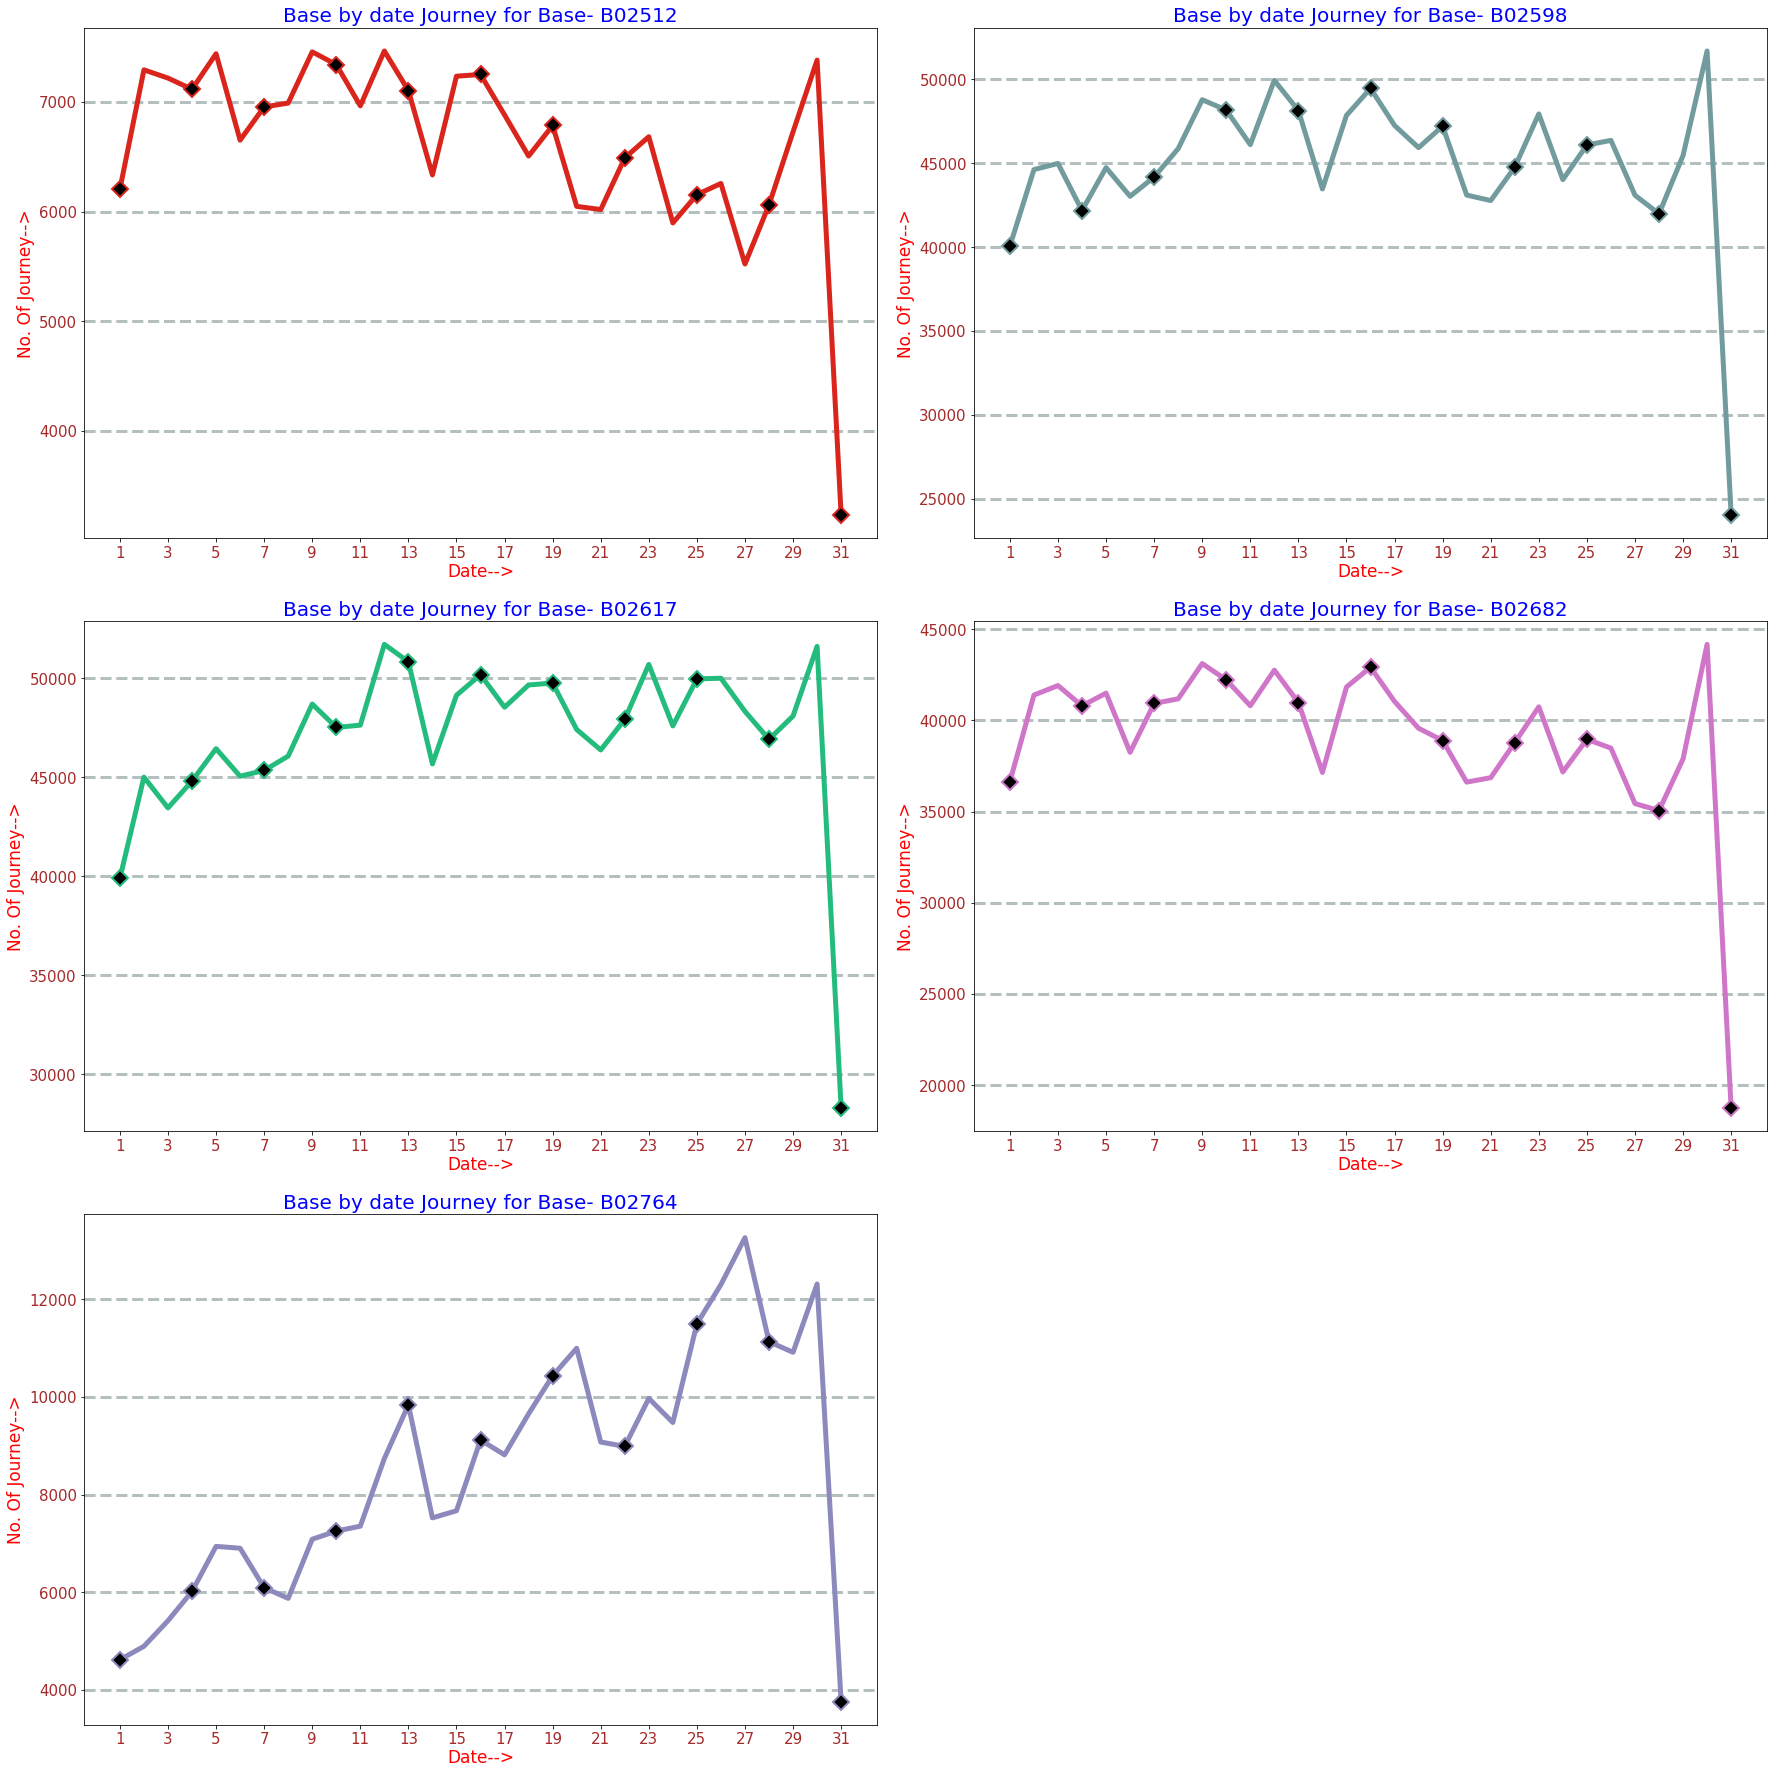

In [59]:

plt.figure(figsize=(25,25))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9","#a1d7e9"]
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.day.value_counts(sort=False).plot(kind="line",
            color=color_list[i],
            linewidth=5,
            marker='D',
            markerfacecolor='black',
            markeredgewidth=2,
            markersize=12,
            markevery=3
            
    )
    plt.title("Base by date Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Date-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base by date.png")

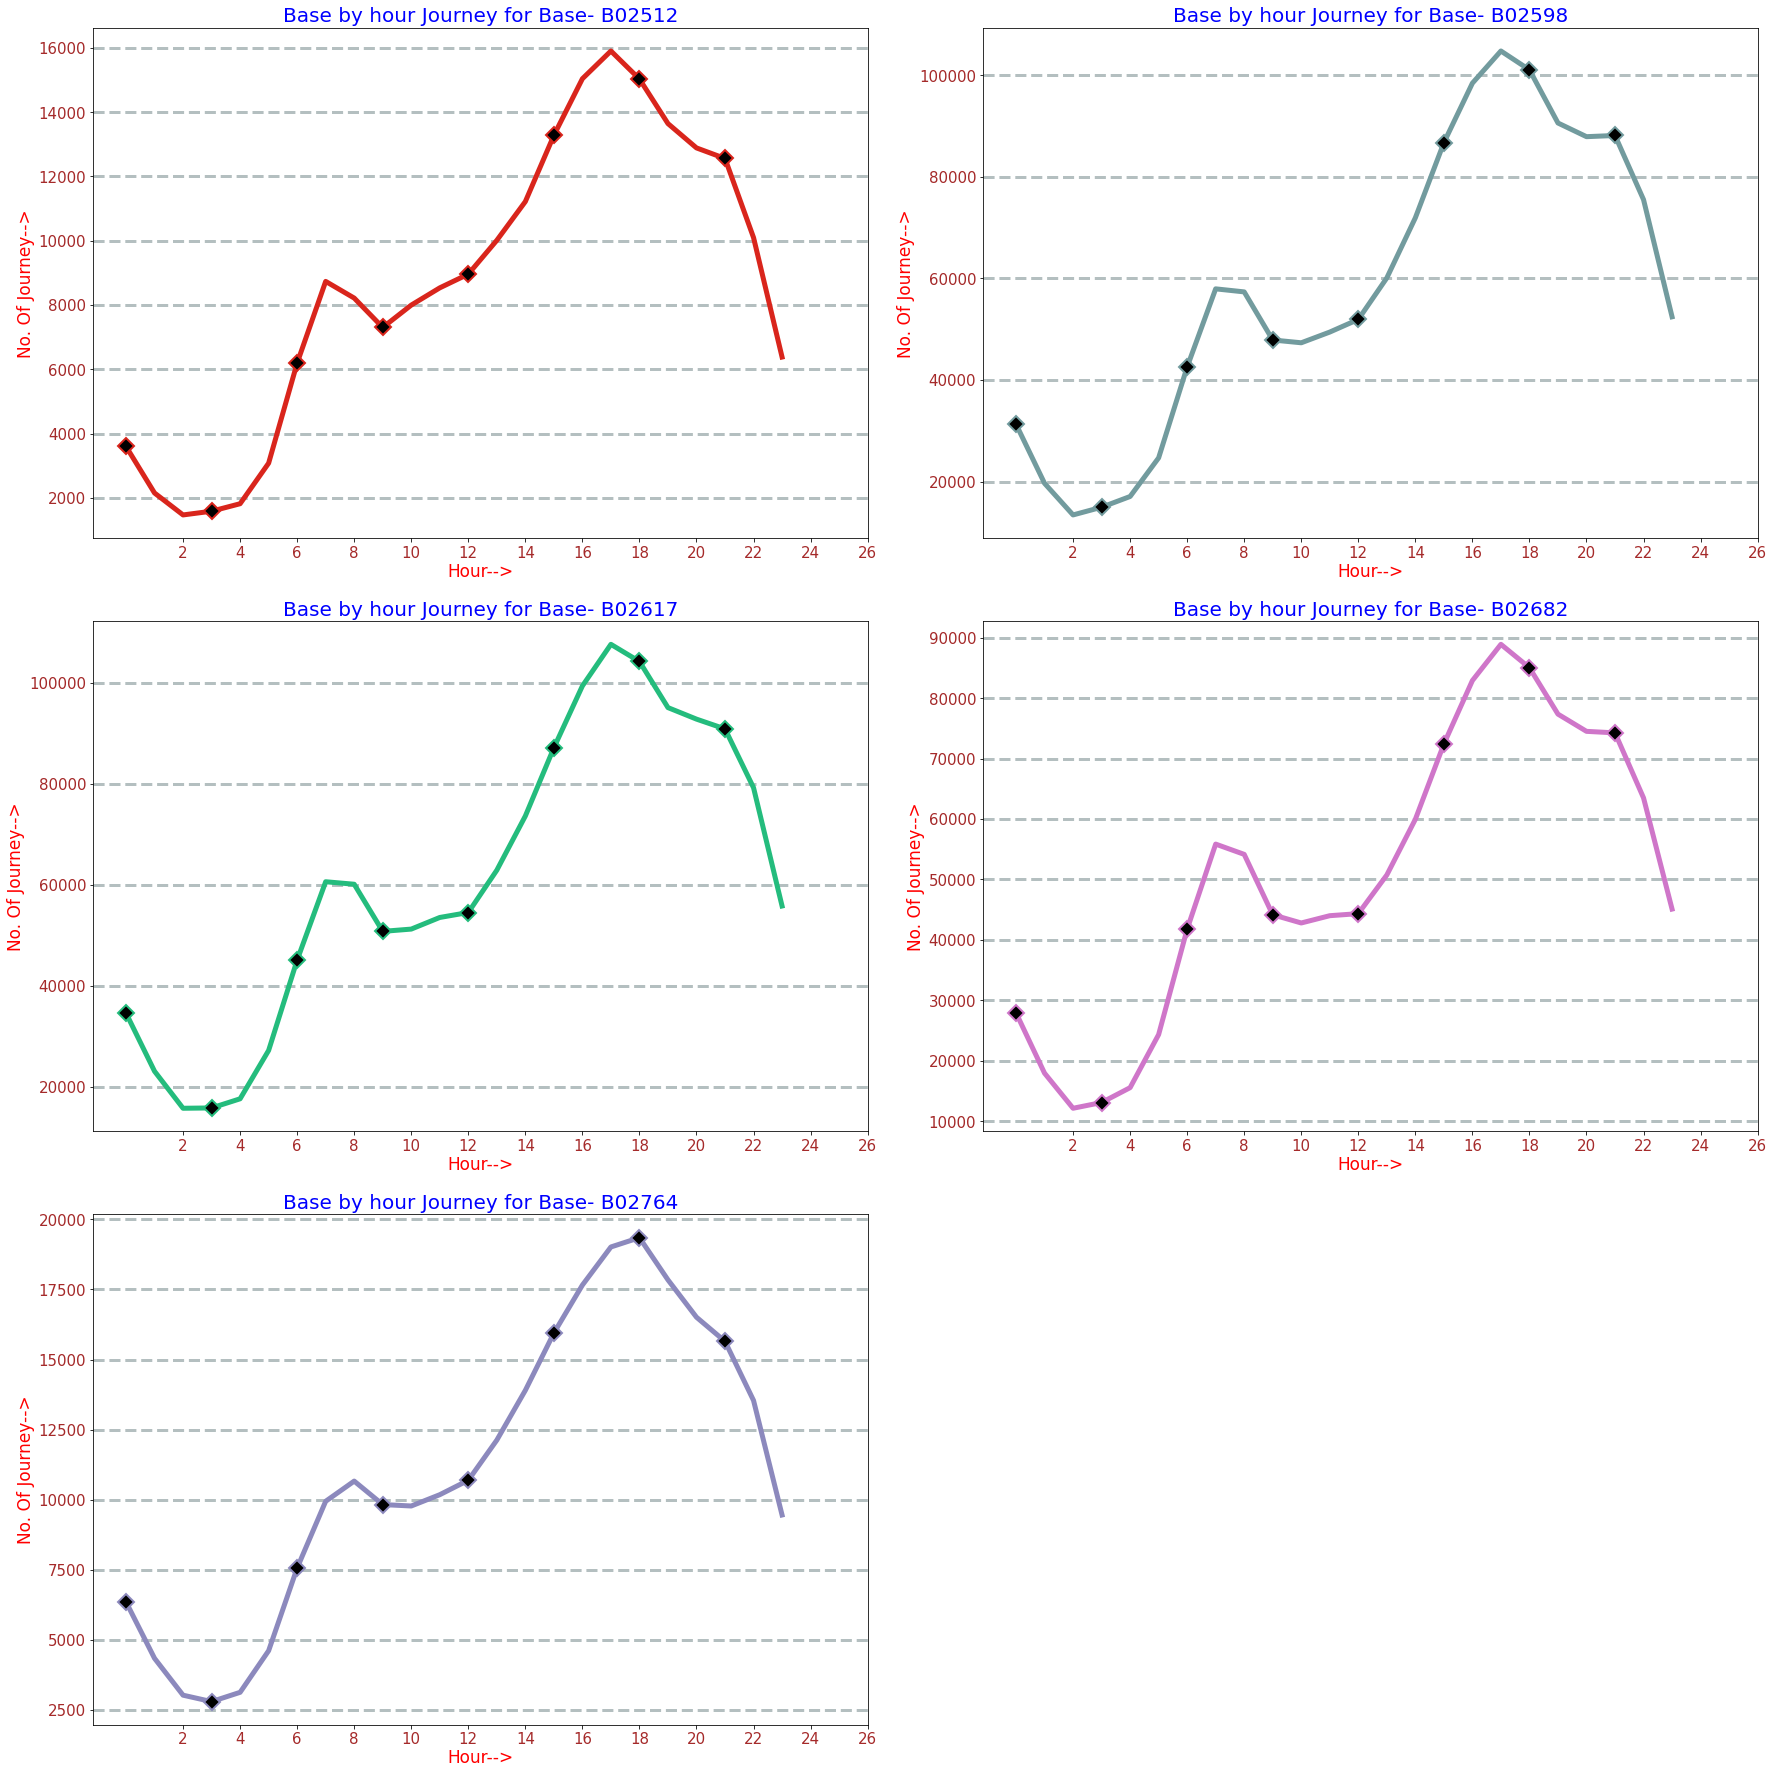

In [60]:
plt.figure(figsize=(25,25))
color_list=["#c87e32","#d9251c","#729b9e","#24bc7d","#cf76c9","#8c89bd","#a1d7e9","#a1d7e9"]
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.hour.value_counts(sort=False).plot(kind="line",
            color=color_list[i],
            linewidth=5,
            marker='D',
            markerfacecolor='black',
            markeredgewidth=2,
            markersize=12,
            markevery=3
            
    )
    plt.title("Base by hour Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base by hour.png")

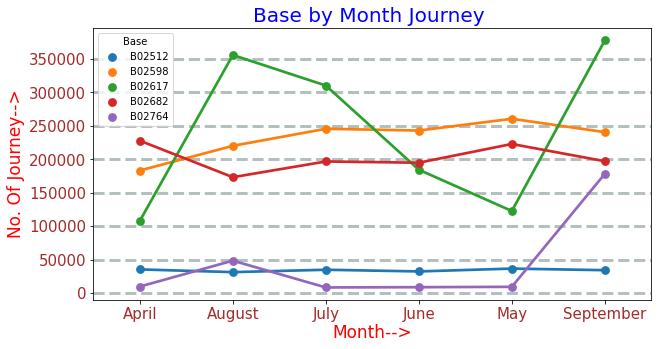

In [61]:
df_base_mh=df.groupby(["Base","month_name"])["Date_Time"].count().reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(data=df_base_mh,x="month_name",y="Date_Time",hue="Base")
plt.title("Base by Month Journey ",fontsize=20,color="blue")
plt.xlabel("Month-->",labelpad=2,fontsize="17",color="red")
plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
plt.xticks(fontsize="15",color="brown")
plt.yticks(fontsize="15",color="brown")
plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
plt.savefig("Journey contribution of all the Base by month linee.png")

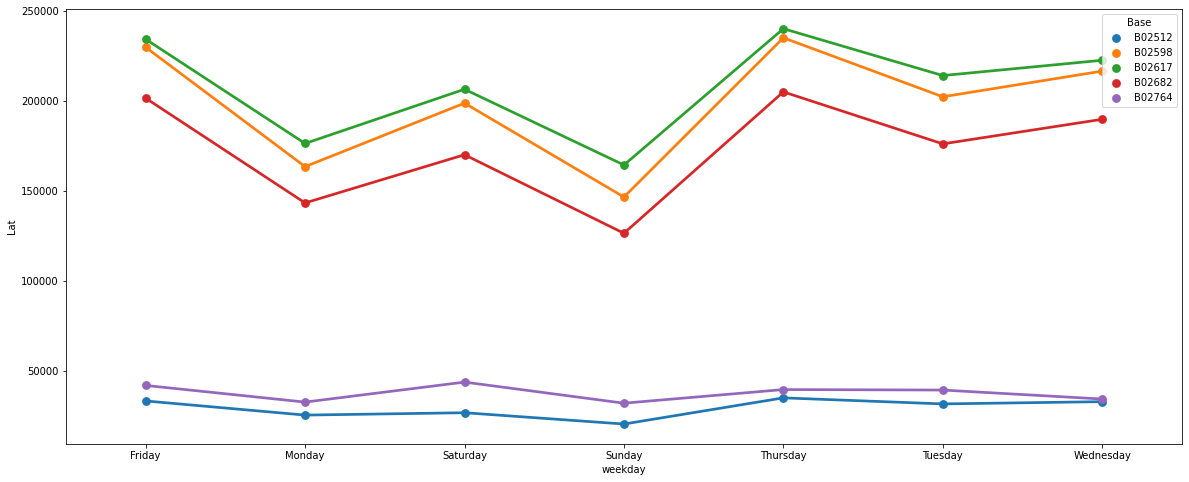

<Figure size 432x288 with 0 Axes>

In [62]:

df_base_lat=df.groupby(["Base","weekday"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_base_lat,x="weekday",y="Lat",hue="Base")
plt.show()
plt.savefig("Journey contribution of all the Base by base line.png")

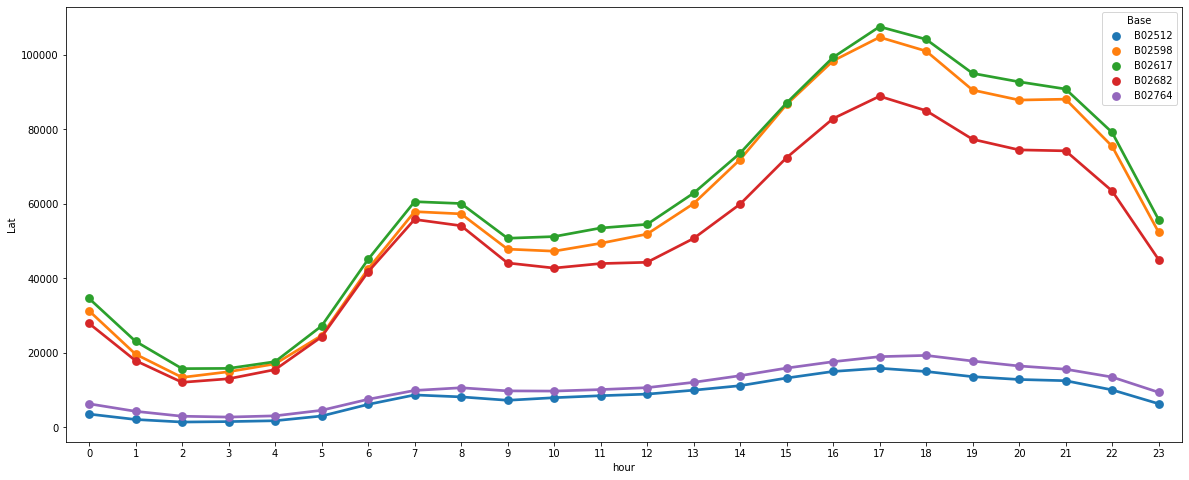

<Figure size 432x288 with 0 Axes>

In [63]:
df_base_lat=df.groupby(["Base","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_base_lat,x="hour",y="Lat",hue="Base")
plt.show()
plt.savefig("Journey contribution of all the Base by hour.png")

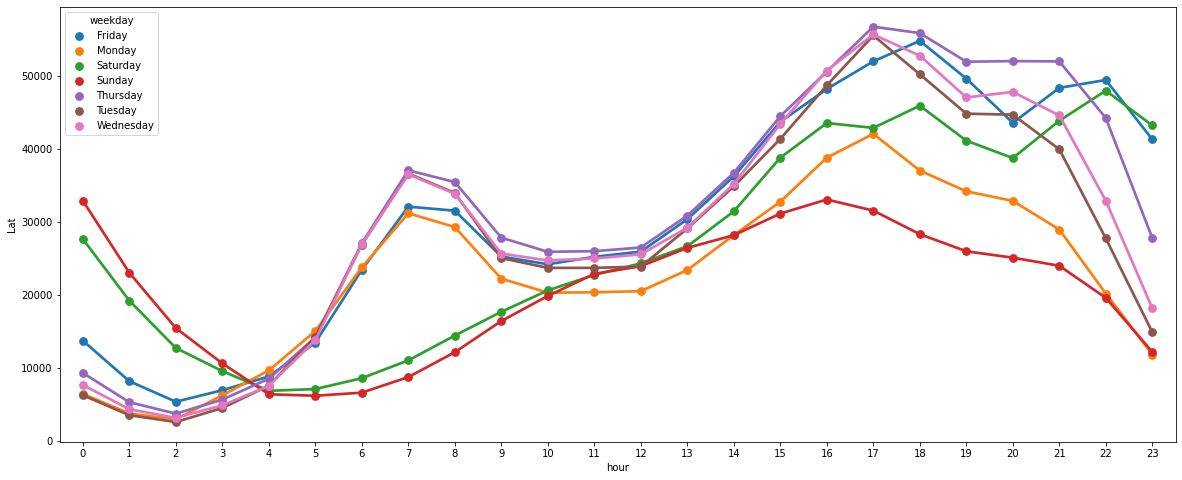

<Figure size 432x288 with 0 Axes>

In [64]:
df_weekday_lat=df.groupby(["weekday","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_weekday_lat,x="hour",y="Lat",hue="weekday")
plt.show()
plt.savefig("Journey contribution of all the weekday by hour.png")

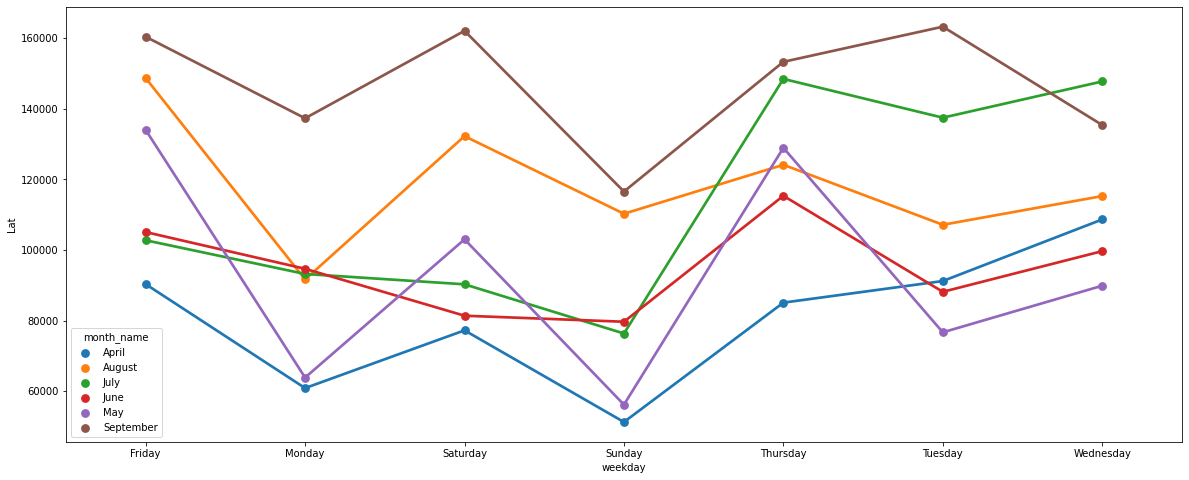

<Figure size 432x288 with 0 Axes>

In [65]:
df_month_lat=df.groupby(["month_name","weekday"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="weekday",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month by weekday.png")

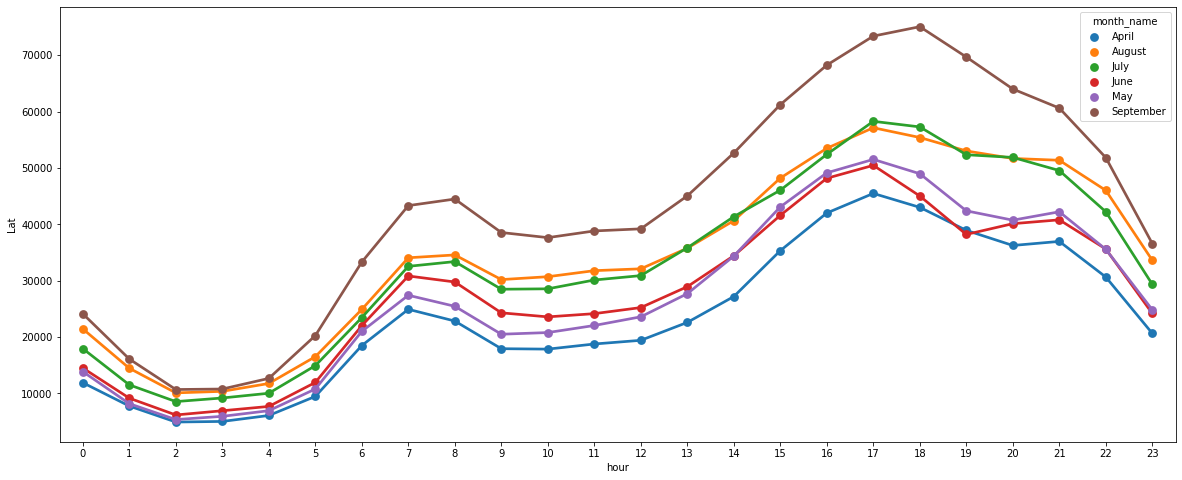

<Figure size 432x288 with 0 Axes>

In [66]:
df_month_lat=df.groupby(["month_name","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="hour",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month name by hour.png")

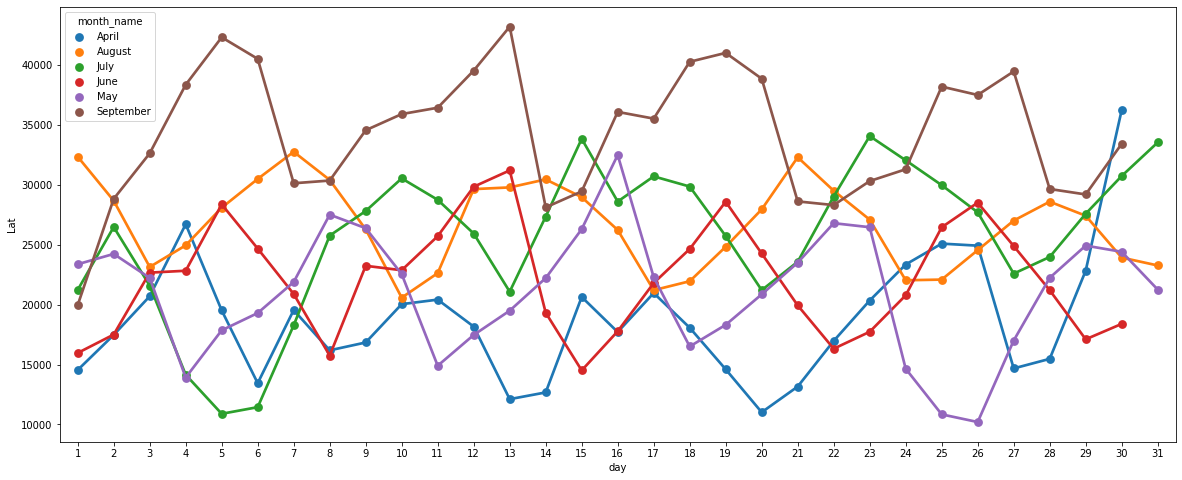

<Figure size 432x288 with 0 Axes>

In [67]:
df_month_lat=df.groupby(["month_name","day"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="day",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month by day.png")

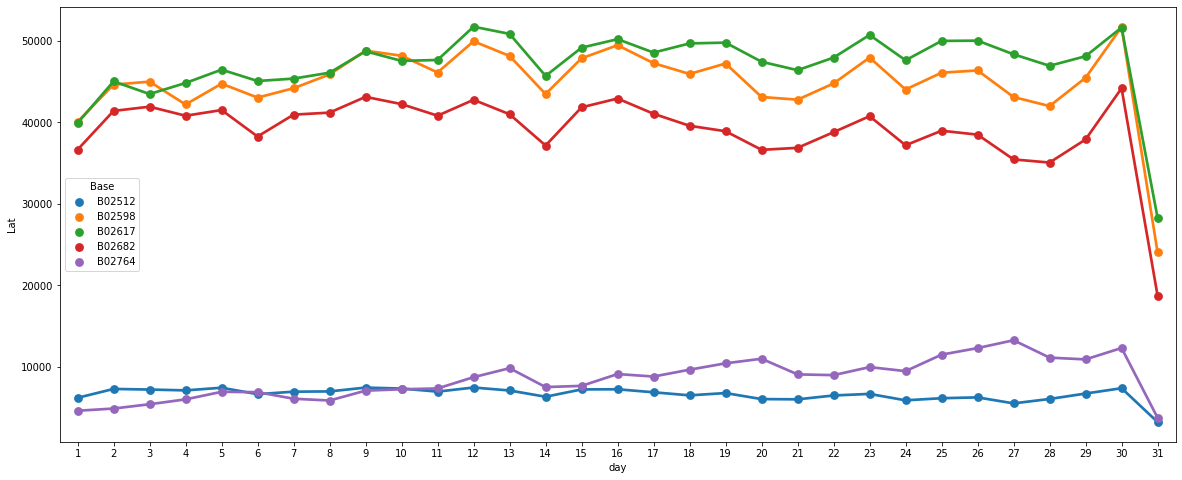

In [68]:
df_month_lat=df.groupby(["Base","day"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="day",y="Lat",hue="Base")
plt.show()